In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
print('train data = {}'.format(len(x_train_image)))
print('train data = {}'.format(len(x_test_image)))

train data = 60000
train data = 10000


In [5]:
print('train data = {}'.format(x_train_image.shape))
print('train data = {}'.format(y_train_label.shape))

train data = (60000, 28, 28)
train data = (60000,)


In [6]:
import matplotlib.pyplot as plt

def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap = 'binary')
    plt.show()

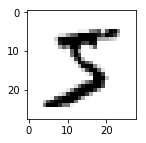

In [7]:
plot_image(x_train_image[0])

In [8]:
y_train_label[0]

5

In [9]:
def plot_images_labels_prediction(images, 
                                  labels,
                                  prediction,
                                  idx,
                                  num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap = 'binary')
        title = f"label = {labels[idx]}"
        if len(prediction) > 0:
            title += f", predict = {prediction[idx]}"
            
        ax.set_title(title, fontsize = 16)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

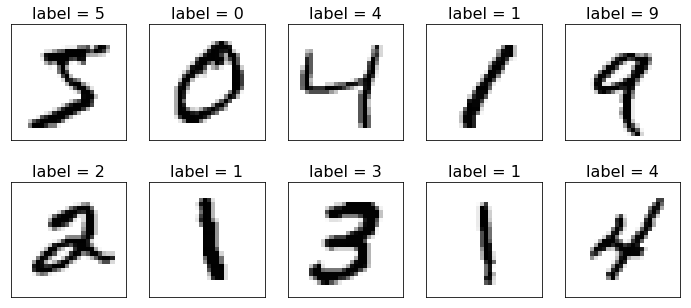

In [10]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [11]:
print(f'x_test_image: {x_test_image.shape}')
print(f'y_test_label: {y_test_label.shape}')

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


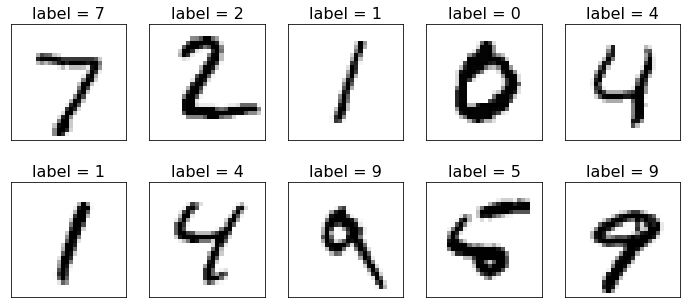

In [12]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

In [13]:
print(f'x_train_image: {x_train_image.shape}')
print(f'y_train_label: {y_train_label.shape}')

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [14]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [15]:
print(f'x_train: {x_Train.shape}')
print(f'y_test: {x_Test.shape}')

x_train: (60000, 784)
y_test: (10000, 784)


In [16]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [18]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [23]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)